In [1]:
import os
from pathlib import Path
from functools import partial

import matplotlib.pyplot as plt

from src.datasets.cookie_ad import CookieAD
from src.preprocessing import InferencePreprocessing

In [2]:
cookie_dataset = partial(
    CookieAD,
    dataset_dir=Path(os.environ["COOKIE_DATASET_DIR"]),
    in_memory=False,
    sample_transform=InferencePreprocessing(
        target_img_width=int(os.environ["IMAGE_WIDTH"]),
        target_img_height=int(os.environ["IMAGE_HEIGHT"]),
    ),
)

ds_train = cookie_dataset(training_set=True)
ds_test = cookie_dataset(training_set=False)

print(f"Train Length: {len(ds_train)}")
print(f"Test Length: {len(ds_test)}")
print(f"Image Shape: {ds_train[0][0].shape}")


Train Length: 176
Test Length: 88
Image Shape: torch.Size([1, 128, 128])


torch.Size([1, 128, 128])
tensor(0)


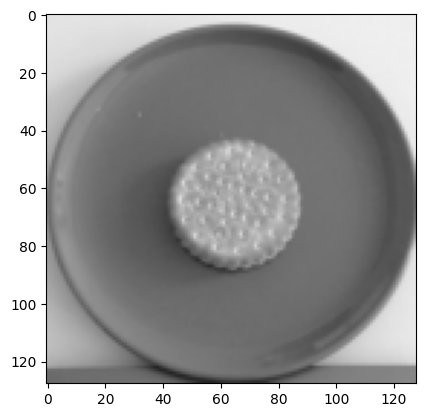

In [22]:
image, label = ds_test[0]
plt.imshow(image.movedim(0, -1), vmin=0, vmax=1, cmap="gray")
print(image.shape)
print(label)

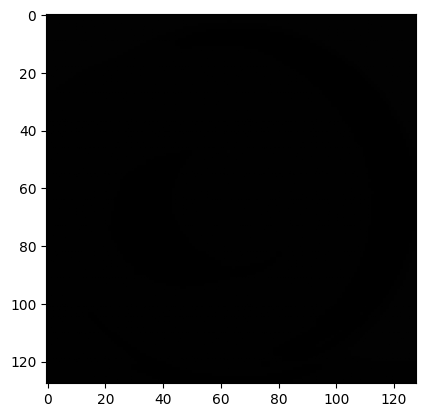

In [31]:
plt.imshow(image.squeeze() * 0.01, vmin=0, vmax=1, cmap="gray")

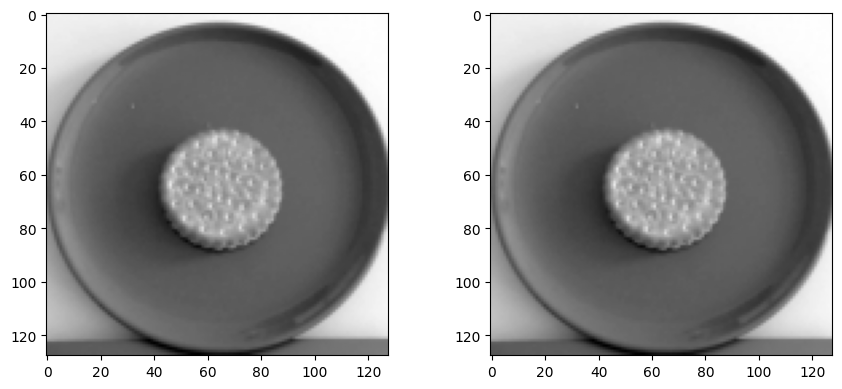

In [36]:
img = image.squeeze() * 0.01

img_norm = img / img.std()
img_v1 = (img_norm - img_norm.min()) / (img_norm.max() - img_norm.min())
img_v2 = (img - img.min()) / (img.max() - img.min())

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), tight_layout=True)
axs[0].imshow(img_v1, vmin=0, vmax=1, cmap="gray")
axs[1].imshow(img_v2, vmin=0, vmax=1, cmap="gray")

In [38]:
(img_v1 - img_v2).abs().mean()

tensor(2.2975e-08)